# Problem 2. Secretary problem with optimal time stopping

I read this problem in the STATtOR magazine [(jaargang 18, nummer 2, juli 2017)](https://www.vvsor.nl/wp-content/uploads/2018/01/STAtOR_2017-2_1-32_LR_spreads.pdf), which is a quaterly publication on Statistics and Operations Research in the Netherlands. I found a well explained solution [here](http://datagenetics.com/blog/december32012/index.html). Below, I summarize the problem, explain the solution and I provide code to reproduce some of the plots in the solution post.

## Problem description
 * You are interviewing candidates in order to hire a new secretary (you can also think of a wife/husband/house).
 * There are $N$ candidates applying for the position. 
 * The potential suitors are all waiting in the next room. 
 * You interview them individually, one-by-one, in a random order. 
 * After each interview, you must make a binary decision: HIRE or PASS. 
 * If you select HIRE, the interview process immediately stops without having a chance to assess the remaining candidates.
 * If you PASS on a candidate, she/he is dismissed for good and you continue interviewing. 
 
#### Problem: What is the optimal strategy to maximize the chances of selecting the best candidate from the applicant group?


## Problem solution
#### Strategy ($k$)
 1. Sample candidates: Interview first $k$ candidates, keep track of their scores and pass on them.
 2. To select the expected best candidate: Keep on interviewing candidates until you find the first candidate whose score exceeds all the scores that you have seen so far.
 3. If such a candidate doesn't exist in the remaining group, then select the last candidate.


#### To find optimal $k$ given $N$

Assume that we follow strategy ($k$), then the conditional probability of success given that the best candidate is at position $j$ is
$$P_{N}(success\,|\, j) = \begin{cases}
      0 & \text{if  $j \leq k$, the best candidate gets dismissed.}\\
      \frac{k}{j-1} & \text{if  $j > k$, one of the sample candidates is the best among the first $j-1$.}
    \end{cases} $$
    
Then 
$$P_{N}(success) = \sum_{j=1}^{N} P_{N}(success\,|\, j)\cdot P_{N}(j) = \sum_{j=k + 1}^{N} \frac{k}{j-1}\cdot \frac{1}{N} = \frac{k}{N} \sum_{j=k + 1}^{N} \frac{1}{j-1} = \frac{k}{N} \sum_{j=k}^{N-1} \frac{1}{j} $$

Notice that the last sum can be interpreted as a Riemann sum of the integral $\int_{k}^{N} \frac{dx}{x} = \ln(x)|_{k}^{N} = \ln(N) - \ln(k) = -\ln\left(\frac{k}{N}\right)$. Substituting this quantity yields
$$P_{N}(success) \approx -\frac{k}{N}\ln\left(\frac{k}{N}\right)$$

Let $x = \frac{k}{N}$ be the proportion of candidates to be dismissed at the beginning, then $P_{N}(success) \approx -x \ln(x)$. To find the critical points of this function, we derive it
$$\frac{d}{dx} \left(-x \ln(x)\right) = -\ln(x) - 1 = 0$$
and solve for $x$ which yields $x = \exp(-1) = 0.3678$. The second derivative $\frac{d^2}{dx^2} \left(-x \ln(x)\right) = \frac{d}{dx}(-\ln(x) - 1) = -\frac{1}{x}$ is negative when evaluated at $x=0.3678$, verifying that the critical point is a maximum.

## Functions for calculations

In [2]:
# prob: Given k & n, calculates the probability of success if Strategy(k) is applied.
# INPUT:
# k  = (integer) number of candidates considered.
# n  = (integer) total number of candidates considered.
# OUTPUT:
# (float) probability of success.
prob = function(k, n){
  j = k:(n-1)
  ratio = 1/j
  return(k/n * sum(ratio))
}

# prob_approx: Given k & n, Approximates the probability of success if Strategy(k) is applied.
# INPUT:
# k  = (integer) number of candidates considered.
# n  = (integer) total number of candidates considered.
# OUTPUT:
# (float) approximation of probability of success (sum in probability function is approx. with logarithm).
prob_approx = function(k,n){
  return(-k/n * log(k/n))
}

## Calculations

In [16]:
# Compute probability values for specific N
# Observe how prob(k,N) behaves as N -> Inf
N = 10000
K = 1:(N-1)

prob_vector = sapply(K, function(k){prob(k, N)})
prob_approx_vector = sapply(K, function(k){prob_approx(k, N)})

## Display results

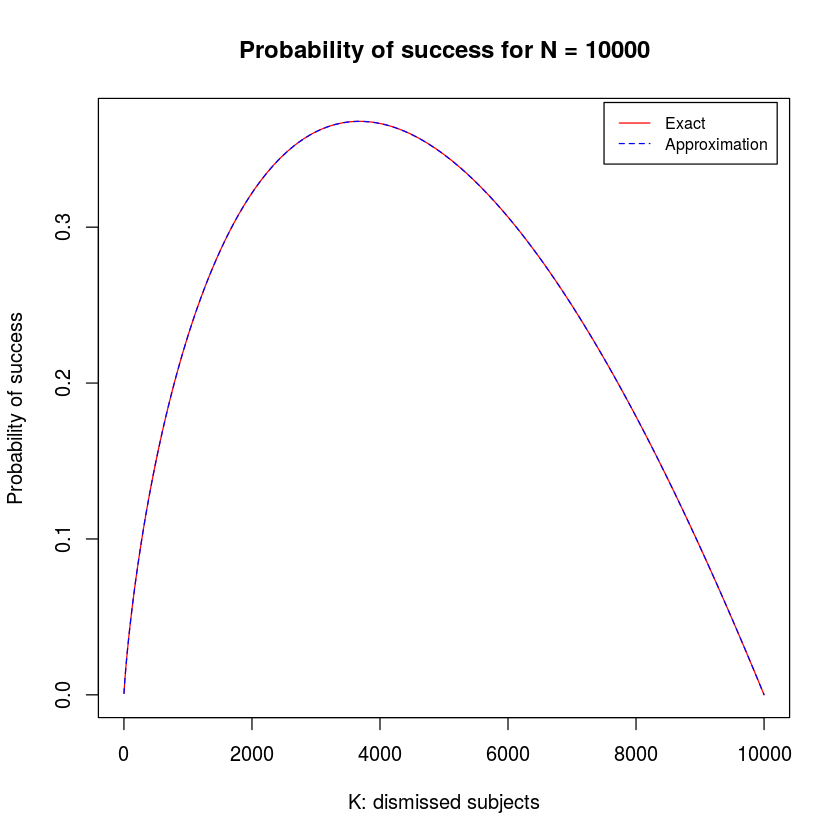

In [23]:
# Plots
# Exact calculation of success probability
plot(K, prob_vector, 
     ylab = 'Probability of success',
     xlab = 'K: dismissed subjects',
     main = paste('Probability of success for N =', N),
     type = 'l', 
     col = 'red')

# Approx. calculation of success probability
lines(prob_approx_vector, 
      lty = 2, 
      col = 'blue')

# Legend
legend(N*0.75, 0.38, 
       legend=c("Exact", "Approximation"),
       col=c("red", "blue"), 
       lty=1:2, cex=0.8)